In [333]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import json

In [334]:
data=pd.read_json('./resorts_links.json')
df=data.copy()

Prepearing the data  -  type changing, clearing data from currency titles, length titles, etc.

In [335]:
df['blue_slopes']=df['blue_slopes'].str.replace(' km','').astype(float)
df['red_slopes']=df['red_slopes'].str.replace(' km','').astype(float)
df['black_slopes']=df['black_slopes'].str.replace(' km','').astype(float)
df[['currency','young_skipass']]= df['young_skipass'].str.split(' ',expand=True)
df=df.drop('currency',axis=1)
df[['currency','child_skipass']]= df['child_skipass'].str.split(' ',expand=True)
df=df.drop('currency',axis=1)
df[['currency','adult_skipass']] =  df['adult_skipass'].str.split(' ',expand=True)
df[['young_skipass','child_skipass','adult_skipass']]=df[['young_skipass','child_skipass','adult_skipass']].astype('float')
df['altitude_min']=df['altitude_max']-df['altitude_dif (minmax)']
# df[['resort_name','indoor_dry_normal']]= df['resort_name'].astype('str').str.split('(',expand=True)

Adjusting info about russian resorts


In [336]:
def region(row):
    if row['continent']=='Russia':
        return 'Russia'
    else:
        return row['country']
df['country']=df.apply(lambda row: region(row),axis=1)

def continent(row):
    if row['country']=='Russia':
        return 'Europe'
    else:
        return row['continent']
df['continent']=df.apply(lambda row: continent(row),axis=1)   

In [337]:
df[df['country']=='Russia'].head()

,continent,country,resort_name,resort_link,altitude_max,altitude_dif (minmax),blue_slopes,red_slopes,black_slopes,adult_skipass,young_skipass,child_skipass,lift_Tram_ropeway,lift_gondola,lift_chair,lift_Tbar,lift_rope_babylift,currency,altitude_min
307,Europe,Russia,Rosa Khutor,https://www.skiresort.info/ski-resort/rosa-khu...,2509.0,1569.0,62.0,24.0,16.0,4900.0,NaN,2900.0,NaN,10.0,11.0,2.0,4.0,RUB,940.0
424,Europe,Russia,Arkhyz,https://www.skiresort.info/ski-resort/arkhyz/,2840.0,1190.0,16.4,6.4,3.8,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,1650.0
462,Europe,Russia,Gazprom Mountain Resort,https://www.skiresort.info/ski-resort/gazprom-...,2256.0,1307.0,17.3,26.3,9.2,4900.0,NaN,2900.0,NaN,7.0,7.0,3.0,NaN,RUB,949.0
483,Europe,Russia,Gorny Vozdukh,https://www.skiresort.info/ski-resort/gorny-vo...,745.0,645.0,15.5,7.5,2.0,NaN,NaN,NaN,NaN,1.0,3.0,2.0,NaN,NaN,100.0
486,Europe,Russia,Krasnaya Polyana Resort,https://www.skiresort.info/ski-resort/krasnaya...,2172.0,1212.0,7.5,20.0,2.5,4900.0,NaN,2900.0,NaN,4.0,7.0,2.0,NaN,RUB,960.0


In [338]:
def int_out_dry(row):  
    if 'indoor' in row['resort_name']:
        return 'indoor'
    elif 'dry slope' in row['resort_name']:
        return 'dry_slope'
    elif 'Heli' in row['resort_name']:
        return 'heli'
    else:
        return 'usual'


df['int_out'] = df.apply(lambda row: int_out_dry(row), axis=1)


In [339]:
df[df['int_out'].str.contains('heli')].head(2)

,continent,country,resort_name,resort_link,altitude_max,altitude_dif (minmax),blue_slopes,red_slopes,black_slopes,adult_skipass,young_skipass,child_skipass,lift_Tram_ropeway,lift_gondola,lift_chair,lift_Tbar,lift_rope_babylift,currency,altitude_min,int_out
5090,North America,Canada,Mica Heli Guides – Mica Creek,https://www.skiresort.info/ski-resort/mica-hel...,2500.0,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,heli
5091,North America,USA,Points North Heli Adventures,https://www.skiresort.info/ski-resort/points-n...,1900.0,1870.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,heli


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6151 entries, 0 to 6150
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              6151 non-null   object 
 1   country                6151 non-null   object 
 2   resort_name            6151 non-null   object 
 3   resort_link            6151 non-null   object 
 4   altitude_max           5449 non-null   float64
 5   altitude_dif (minmax)  5449 non-null   float64
 6   blue_slopes            5302 non-null   float64
 7   red_slopes             5302 non-null   float64
 8   black_slopes           5302 non-null   float64
 9   adult_skipass          3513 non-null   float64
 10  young_skipass          641 non-null    float64
 11  child_skipass          1358 non-null   float64
 12  lift_Tram_ropeway      198 non-null    float64
 13  lift_gondola           518 non-null    float64
 14  lift_chair             2122 non-null   float64
 15  lift

Beer prices (source: https://www.numbeo.com/cost-of-living/country_price_rankings?itemId=15)

In [341]:
beer  = pd.read_excel('./Beer prices.xlsx')

In [342]:
beer['country']=beer['country'].str.replace('\t','')
df_beer = df.merge(beer, on='country',how='left')

Currency normal

In [343]:
currency_analog={'SFr.':'CHF', 'EUR':'EUR', 'NaN':'NaN', 'C$':'CAD', 'US$':'USD', 'Yen':'JPY', 'RSD':'RSD', 'BGN':'BGN', 'NOK':'NOK',
       'Skr':'SEK', 'CZK':'CZK', 'ARS':'ARS', 'BAM':'BAM', 'RUB':'RUB', 'PLN':'PLN', 'TRY':'TRY', 'UAH':'UAH', 'GEL':'GEL',
       'AU$':'AUD', 'Ұ':'JPY', 'NZ$':'NZD', 'Rs':'INR', 'AZN':'AZN', 'KZT':'KZT', 'CLP':'CLP', 'KRW':'KRW', 'RON':'RON', 'ISK':'ISK',
       'AED':'AED', 'AMD':'AMD', '£':'GBP', 'KGS':'KGS', 'ILS':'ILS', 'MKD':'MKD', 'LBP':'LBP', 'HUF':'HUF', 'ZAR':'ZAR', 'R$':'BRL',
       'DKK':'DKK', 'HRK':'HRK'}

df_beer['currency']=df_beer['currency'].map(currency_analog)
cur_rate= pd.read_json('./forex.json')
cur_name = pd.read_excel('./currencies.xlsx')
cur_rate=cur_rate.merge(cur_name,on='Currency',how='left')
# cur=cur.merge(cur_name,left_on=0,right_on='Code',how='left')
df_beer=df_beer.merge(cur_rate,left_on='currency',right_on='Code',how='left')


Exchanging everyting in EUR

In [344]:
def categorise(row):  
    if row['currency'] =='EUR':
        return 1
    else:
        return row['Rate']

df_beer['cur_multiplier'] = df_beer.apply(lambda row: categorise(row), axis=1)

df_beer['adult_skipass_EUR']=df_beer['adult_skipass'].divide(df_beer['cur_multiplier'])
df_beer['young_skipass_EUR']=df_beer['young_skipass'].divide(df_beer['cur_multiplier'])
df_beer['child_skipass_EUR']=df_beer['child_skipass'].divide(df_beer['cur_multiplier'])


Creating DF for analysis

In [345]:
df_cleared=df_beer[['continent', 'country', 'resort_name', 'resort_link', 'altitude_min', 'altitude_max',
       'altitude_dif (minmax)', 'blue_slopes', 'red_slopes', 'black_slopes',
       'lift_Tram_ropeway',
       'lift_gondola', 'lift_chair', 'lift_Tbar', 'lift_rope_babylift',
       'currency', 'Beer_Price_EUR', 'adult_skipass_EUR', 'young_skipass_EUR',
       'child_skipass_EUR','int_out']]


DESCRIPTIVE ANALYSIS

General info

In [346]:
df_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6151 entries, 0 to 6150
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              6151 non-null   object 
 1   country                6151 non-null   object 
 2   resort_name            6151 non-null   object 
 3   resort_link            6151 non-null   object 
 4   altitude_min           5449 non-null   float64
 5   altitude_max           5449 non-null   float64
 6   altitude_dif (minmax)  5449 non-null   float64
 7   blue_slopes            5302 non-null   float64
 8   red_slopes             5302 non-null   float64
 9   black_slopes           5302 non-null   float64
 10  lift_Tram_ropeway      198 non-null    float64
 11  lift_gondola           518 non-null    float64
 12  lift_chair             2122 non-null   float64
 13  lift_Tbar              3322 non-null   float64
 14  lift_rope_babylift     1803 non-null   float64
 15  curr

Correlation between variables

In [347]:
df_cleared.corr().style.background_gradient(cmap='Blues')

e:\Users\vasilev_me\AppData\Local\Temp\ipykernel_20356\2787294464.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleared.corr().style.background_gradient(cmap='Blues')


,altitude_min,altitude_max,altitude_dif (minmax),blue_slopes,red_slopes,black_slopes,lift_Tram_ropeway,lift_gondola,lift_chair,lift_Tbar,lift_rope_babylift,Beer_Price_EUR,adult_skipass_EUR,young_skipass_EUR,child_skipass_EUR
altitude_min,1.000000,0.902675,0.388443,0.213055,0.276147,0.300774,0.058120,-0.022422,0.132318,0.118156,0.014701,0.021091,0.341880,0.410274,0.367423
altitude_max,0.902675,1.000000,0.747170,0.416961,0.496075,0.459286,0.393904,0.256935,0.310695,0.289878,0.099134,0.107145,0.462160,0.500997,0.440595
altitude_dif (minmax),0.388443,0.747170,1.000000,0.589708,0.663909,0.539674,0.439959,0.461027,0.456014,0.422719,0.188592,0.183394,0.455475,0.452551,0.404599
blue_slopes,0.213055,0.416961,0.589708,1.000000,0.794224,0.601615,0.299751,0.650177,0.738177,0.706049,0.275124,0.134028,0.333528,0.431083,0.432960
red_slopes,0.276147,0.496075,0.663909,0.794224,1.000000,0.764849,0.474235,0.588303,0.734375,0.586680,0.253333,0.129595,0.508948,0.535027,0.544916
black_slopes,0.300774,0.459286,0.539674,0.601615,0.764849,1.000000,0.262950,0.401454,0.596991,0.397554,0.170580,0.176051,0.669761,0.609411,0.642357
lift_Tram_ropeway,0.058120,0.393904,0.439959,0.299751,0.474235,0.262950,1.000000,0.334183,0.303363,0.177623,0.177600,0.080709,0.125867,0.071147,-0.090446
lift_gondola,-0.022422,0.256935,0.461027,0.650177,0.588303,0.401454,0.334183,1.000000,0.527465,0.416466,0.435254,-0.032776,0.091134,0.144281,0.004214
lift_chair,0.132318,0.310695,0.456014,0.738177,0.734375,0.596991,0.303363,0.527465,1.000000,0.580991,0.337892,0.105239,0.395153,0.760726,0.670040
lift_Tbar,0.118156,0.289878,0.422719,0.706049,0.586680,0.397554,0.177623,0.416466,0.580991,1.000000,0.339854,0.145970,0.207227,0.117147,0.125620


Stat description of the data

In [348]:
df_cleared.describe()

,altitude_min,altitude_max,altitude_dif (minmax),blue_slopes,red_slopes,black_slopes,lift_Tram_ropeway,lift_gondola,lift_chair,lift_Tbar,lift_rope_babylift,Beer_Price_EUR,adult_skipass_EUR,young_skipass_EUR,child_skipass_EUR
count,5449.000000,5449.000000,5449.000000,5302.000000,5302.000000,5302.000000,198.000000,518.000000,2122.000000,3322.000000,1803.000000,5464.000000,3474.000000,639.000000,1326.000000
mean,786.169389,1088.964030,302.794641,4.335025,4.817503,2.156224,1.560606,2.374517,3.899152,2.728477,1.420410,1.411876,36.355580,40.068671,30.395624
std,571.207249,791.943004,369.834013,11.844804,13.350009,6.847247,0.999423,3.063905,4.948505,3.475690,0.956701,0.685130,28.690530,27.011440,24.545650
min,-4.000000,-1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.660000,2.000000,2.817804,0.939268
25%,360.000000,510.000000,70.000000,0.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.790000,20.000000,23.157225,15.809516
50%,696.000000,890.000000,156.000000,1.200000,0.900000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.140000,29.488567,33.234895,23.488429
75%,1100.000000,1557.000000,390.000000,3.600000,4.000000,1.500000,2.000000,2.000000,5.000000,3.000000,2.000000,1.990000,43.724426,48.469245,35.589649
max,4000.000000,5300.000000,3167.000000,312.000000,220.000000,126.000000,8.000000,34.000000,72.000000,73.000000,10.000000,4.120000,277.084024,227.302827,196.306987


Prepearing PBI set

In [349]:
df_pbi=df_cleared.copy()
df_pbi['advanced_slopes']=df_pbi['black_slopes']+df_pbi['red_slopes']
df_pbi['ttl_slopes']=df_pbi['black_slopes']+df_pbi['red_slopes']+df_pbi['blue_slopes']
df_pbi['price_per_advanced_slope_km']=df_pbi['adult_skipass_EUR'].divide(df_pbi['advanced_slopes'])
df_pbi['price_per_ttl_slope_km']=df_pbi['adult_skipass_EUR'].divide(df_pbi['ttl_slopes'])

In [350]:



df_pbi.to_excel('data_for_PBI.xlsx')

In [351]:
df_country_Slope = df_cleared[['country','blue_slopes', 'red_slopes', 'black_slopes']].copy()
df_country_Slope['ttl_slopes']=df_country_Slope['black_slopes']+df_country_Slope['red_slopes']+df_country_Slope['blue_slopes']
df_country_Slope=df_country_Slope[['country','ttl_slopes']].groupby('country').sum().sort_values(by='ttl_slopes',ascending=False).reset_index()

In [352]:
df_country_Slope=df_country_Slope.head(15)

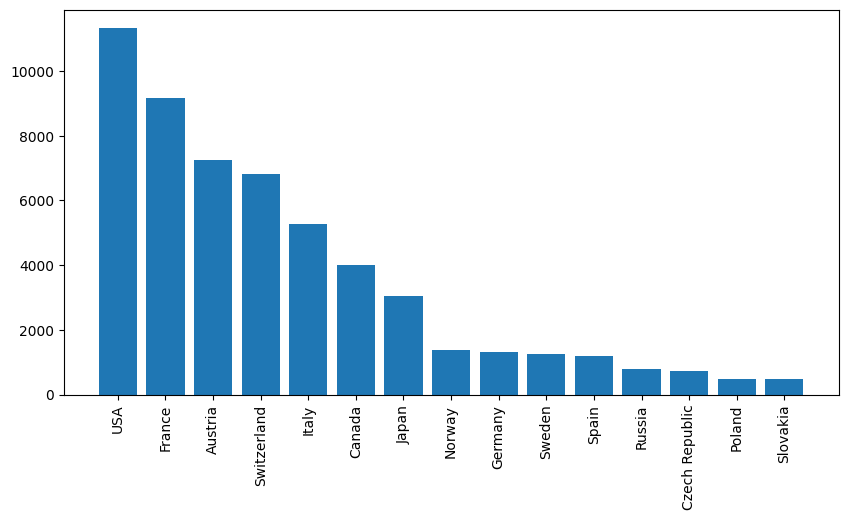

In [353]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df_country_Slope['country'],df_country_Slope['ttl_slopes'])
plt.xticks(rotation = 90)
plt.show()

In [354]:
df_resort_Slope = df_cleared[['country','resort_name','blue_slopes', 'red_slopes', 'black_slopes','adult_skipass_EUR','Beer_Price_EUR']].copy()
df_resort_Slope['advanced_slopes']=df_resort_Slope['black_slopes']+df_resort_Slope['red_slopes']
df_resort_Slope['ttl_slopes']=df_resort_Slope['black_slopes']+df_resort_Slope['red_slopes']+df_resort_Slope['blue_slopes']
df_resort_Slope['price_per_advanced_slope_km']=df_resort_Slope['adult_skipass_EUR'].divide(df_resort_Slope['advanced_slopes'])
df_resort_Slope['price_per_ttl_slope_km']=df_resort_Slope['adult_skipass_EUR'].divide(df_resort_Slope['ttl_slopes'])

In [355]:
df_resort_Slope=df_resort_Slope.sort_values(by='advanced_slopes',ascending=False).reset_index(drop=True)


CORELLATION BETWEEN SLOPES LENGTH AND PRICE

Pearson method

In [356]:
df_resort_Slope[['adult_skipass_EUR','advanced_slopes','ttl_slopes']].corr()


,adult_skipass_EUR,advanced_slopes,ttl_slopes
adult_skipass_EUR,1.000000,0.597302,0.526395
advanced_slopes,0.597302,1.000000,0.966068
ttl_slopes,0.526395,0.966068,1.000000


Kendall method

In [357]:
df_resort_Slope[['adult_skipass_EUR','advanced_slopes','ttl_slopes']].corr(method='kendall')

,adult_skipass_EUR,advanced_slopes,ttl_slopes
adult_skipass_EUR,1.000000,0.545394,0.555584
advanced_slopes,0.545394,1.000000,0.827465
ttl_slopes,0.555584,0.827465,1.000000


Spearman method

In [358]:
df_resort_Slope[['adult_skipass_EUR','advanced_slopes','ttl_slopes']].corr(method='spearman')

,adult_skipass_EUR,advanced_slopes,ttl_slopes
adult_skipass_EUR,1.000000,0.727604,0.739833
advanced_slopes,0.727604,1.000000,0.936183
ttl_slopes,0.739833,0.936183,1.000000


Looks like there is no interdependance

Let's look for the cheapest resort. We will measure it as price per km of slopes. firstly per km ofadvanced slopes, second per km of total slopes. Below there top 5 resorts.

In [359]:
df_resort_Slope.sort_values(by=['price_per_advanced_slope_km'],ascending=True).reset_index(drop=True).head(10)

,country,resort_name,blue_slopes,red_slopes,black_slopes,adult_skipass_EUR,Beer_Price_EUR,advanced_slopes,ttl_slopes,price_per_advanced_slope_km,price_per_ttl_slope_km
0,Italy,Via Lattea – Sestriere/​Sauze d’Oulx/​San Sica...,96.0,220.0,84.0,53.500000,1.43,304.0,400.0,0.175987,0.133750
1,France,Les Sybelles – Le Corbier/​La Toussuire/​Les B...,71.3,217.0,21.7,50.400000,2.07,238.7,310.0,0.211144,0.162581
2,China,Wanfeng – Tonghua,12.0,10.0,9.0,4.035352,0.78,19.0,31.0,0.212387,0.130173
3,Switzerland,Les Portes du Soleil – Morzine/​Avoriaz/​Les G...,310.0,210.0,60.0,62.000000,2.02,270.0,580.0,0.229630,0.106897
4,France,Les 3 Vallées – Val Thorens/​Les Menuires/​Mér...,312.0,216.0,72.0,72.000000,2.07,288.0,600.0,0.250000,0.120000
5,Switzerland,4 Vallées – Verbier/​La Tzoumaz/​Nendaz/​Veyso...,107.0,202.0,103.0,83.381464,2.02,305.0,412.0,0.273382,0.202382
6,China,Thaiwoo,6.0,8.0,6.0,4.104927,0.78,14.0,20.0,0.293209,0.205246
7,France,Alpe d'Huez,70.0,130.0,50.0,58.000000,2.07,180.0,250.0,0.322222,0.232000
8,France,Megève/​Saint-Gervais,98.0,134.0,31.0,55.000000,2.07,165.0,263.0,0.333333,0.209125
9,Austria,Ischgl/​Samnaun – Silvretta Arena,47.0,143.0,49.0,67.000000,1.08,192.0,239.0,0.348958,0.280335


In [360]:
df_resort_Slope.sort_values(by=['price_per_ttl_slope_km'],ascending=True).reset_index(drop=True).head(10)


,country,resort_name,blue_slopes,red_slopes,black_slopes,adult_skipass_EUR,Beer_Price_EUR,advanced_slopes,ttl_slopes,price_per_advanced_slope_km,price_per_ttl_slope_km
0,Switzerland,Les Portes du Soleil – Morzine/​Avoriaz/​Les G...,310.0,210.0,60.0,62.000000,2.02,270.0,580.0,0.229630,0.106897
1,France,Les 3 Vallées – Val Thorens/​Les Menuires/​Mér...,312.0,216.0,72.0,72.000000,2.07,288.0,600.0,0.250000,0.120000
2,China,Wanfeng – Tonghua,12.0,10.0,9.0,4.035352,0.78,19.0,31.0,0.212387,0.130173
3,Italy,Via Lattea – Sestriere/​Sauze d’Oulx/​San Sica...,96.0,220.0,84.0,53.500000,1.43,304.0,400.0,0.175987,0.133750
4,France,Les Sybelles – Le Corbier/​La Toussuire/​Les B...,71.3,217.0,21.7,50.400000,2.07,238.7,310.0,0.211144,0.162581
5,France,Le Grand Massif – Flaine/​Les Carroz/​Morillon...,135.0,95.0,35.0,53.500000,2.07,130.0,265.0,0.411538,0.201887
6,Switzerland,4 Vallées – Verbier/​La Tzoumaz/​Nendaz/​Veyso...,107.0,202.0,103.0,83.381464,2.02,305.0,412.0,0.273382,0.202382
7,China,Thaiwoo,6.0,8.0,6.0,4.104927,0.78,14.0,20.0,0.293209,0.205246
8,France,Megève/​Saint-Gervais,98.0,134.0,31.0,55.000000,2.07,165.0,263.0,0.333333,0.209125
9,France,Tignes/​Val d'Isère,170.0,78.0,52.0,63.000000,2.07,130.0,300.0,0.484615,0.210000


In [361]:
df_resort_Slope=df_resort_Slope[df_resort_Slope['ttl_slopes']>0]

Text(0.5, 1.0, 'BLACK')

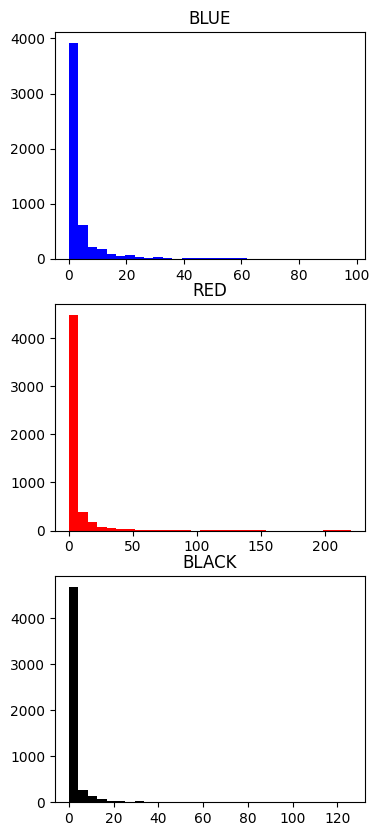

In [362]:


fig1, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1,figsize=(4,10)) # two axes on figure
ax1.hist(df_resort_Slope[df_resort_Slope['blue_slopes']<100]['blue_slopes'],bins=30,color='blue')
ax1.set_title('BLUE')
ax2.hist(df_resort_Slope[df_resort_Slope['red_slopes']<300]['red_slopes'],bins=30,color='red')
ax2.set_title('RED')
ax3.hist(df_resort_Slope[df_resort_Slope['black_slopes']<200]['black_slopes'],bins=30,color='black')
ax3.set_title('BLACK')
